In [1]:
import numpy as np
import pandas as pd
url ='Hospital_Management.csv'
df = pd.read_csv(url)
df.head(25)

,Patient_ID,Patient_Name,Patient_Age,Patient_Address,Doctor_Name,Doctor_Age,Room_Type,Staff_Name,Billing,Pharmacy,Equipment_Type,Hospital_Rating,Hospital_Type,Hospital_Address,Feedback,InPatient,Hospital_Performance,Patient_bill
0,1,Mohammed,21,AhmedaGeneral,Dr.Amit,32,ICU,Ram,Cash,InHouse,Diagnostic Tools,1,General,AhmedaGeneral,Bad,1,Bad,1500
1,2,Sunita,22,Surat,Dr.Vikas,41,ICU,Raj,Card,Retail,Treatment Equipment,2,Specialized,Surat,Bad,0,Bad,1300
2,5,Santosh,14,Mumbai,Dr.Vikram,64,Private,Riya,Cash,Compounding,Surgical Equipment,3,General,Mumbai,Good,1,Bad,12000
3,6,Sanjay,49,Delhi,Dr.Pooja,33,Isolation,Shivani,Card,Retail,Diagnostic Tools,3,Specialized,Delhi,Average,1,Bad,1350
4,7,Sunil,62,Lucknow,Dr.Priya,45,Operation Room,Palak,Insurance,InHouse,Diagnostic Tools,3,Private,Lucknow,Excellent,1,Bad,1225
5,8,Rajesh,69,HyderaGeneral,Dr.Vivek,71,Semi-Private,Dev,Cash,Mail Order,Treatment Equipment,2,Specialized,HyderaGeneral,Good,0,Bad,500
6,9,Geeta,73,Bangalore,Dr.Arvinder,57,Semi-Private,Prem,Card,InHouse,Surgical Equipment,1,General,Bangalore,Good,1,Bad,1658
7,13,Manoj,32,Dahod,Dr.Satish,48,Semi-Private,Geeta,Card,Compounding,Diagnostic Tools,3,General,Dahod,Good,0,Bad,3000
8,15,Suresh,37,Bharuch,Dr.Aman,52,Private,Ashok,Cash,InHouse,Diagnostic Tools,1,Private,Bharuch,Average,1,Bad,2500
9,16,Vijay,14,Gandhinagar,Dr.Chandni,36,Isolation,Rekha,Card,InHouse,Treatment Equipment,2,Specialized,Gandhinagar,Good,1,Bad,1360


In [2]:
df['Room_Type'].unique()

array(['ICU', 'Private', 'Isolation', 'Operation Room', 'Semi-Private',
       'General'], dtype=object)

In [3]:
df['Room_Type'] = df['Room_Type'].replace(['ICU','Private','Isolation','Operation Room','Semi-Private','General'],
                                          [1,2,3,4,5,6])

In [4]:
df['Billing'].unique()

array(['Cash', 'Card', 'Insurance'], dtype=object)

In [5]:
df['Billing'] = df['Billing'].replace(['Cash','Card','Insurance'],[1,2,3])

In [6]:
df['Pharmacy'].unique()

array(['InHouse', 'Retail', 'Compounding', 'Mail Order'], dtype=object)

In [7]:
df['Pharmacy'] = df['Pharmacy'].replace(['InHouse','Retail','Compounding','Mail Order'],[1,2,3,4])

In [8]:
df['Equipment_Type'].unique()

array(['Diagnostic Tools', 'Treatment Equipment', 'Surgical Equipment'],
      dtype=object)

In [9]:
df['Equipment_Type'] = df['Equipment_Type'].replace(['Diagnostic Tools','Treatment Equipment','Surgical Equipment'],[1,2,3])

In [10]:
df['Hospital_Type'].unique()

array(['General', 'Specialized', 'Private'], dtype=object)

In [11]:
df['Hospital_Type'] = df['Hospital_Type'].replace(['General','Specialized','Private'],[1,2,3])

In [12]:
df['Feedback'].unique()

array(['Bad', 'Excellent', 'Average', 'Good'], dtype=object)

In [13]:
df['Feedback'] = df['Feedback'].replace(['Bad','Excellent','Average','Good'],[0,3,1,2])

In [14]:
df['Hospital_Performance'].unique()

array(['Bad', 'Good'], dtype=object)

In [15]:
df['Hospital_Performance'] = df['Hospital_Performance'].replace(['Bad','Good'],[0,1])

In [16]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,[2,6,8,9,10,11,12,14,15]].values
y = df.iloc[:,16].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10,random_state=None,shuffle=False)
kfold.get_n_splits(x,y)

for train_index,test_index in kfold.split(x,y):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
print("Training Data")    
display(x_train,x_test)
print("Testing Data")
display(y_train,y_test)

Training Data


array([[21,  1,  1, ...,  1,  0,  1],
       [22,  1,  2, ...,  2,  0,  0],
       [38,  2,  2, ...,  3,  3,  0],
       ...,
       [30,  6,  1, ...,  1,  0,  0],
       [64,  1,  1, ...,  2,  3,  1],
       [45,  2,  2, ...,  3,  1,  1]])

array([[37,  3,  3,  1,  1,  1,  1,  0,  0],
       [49,  5,  3,  2,  1,  4,  3,  3,  0],
       [55,  1,  1,  3,  2,  3,  3,  1,  0],
       [78,  5,  1,  4,  2,  1,  2,  0,  1],
       [39,  1,  2,  2,  3,  2,  1,  1,  0],
       [58,  1,  1,  1,  2,  4,  3,  2,  1],
       [25,  5,  1,  1,  1,  4,  2,  2,  0],
       [54,  1,  3,  2,  3,  4,  1,  2,  1],
       [49,  3,  1,  3,  1,  0,  2,  0,  1],
       [28,  5,  2,  4,  2,  1,  3,  1,  1],
       [28,  6,  1,  3,  2,  2,  1,  1,  1],
       [38,  5,  3,  2,  3,  1,  1,  0,  0],
       [79,  1,  2,  1,  2,  1,  1,  0,  0],
       [20,  1,  2,  4,  1,  2,  2,  1,  0],
       [53,  6,  3,  1,  3,  5,  3,  3,  1],
       [24,  5,  1,  1,  2,  5,  2,  3,  1],
       [60,  3,  2,  1,  1,  3,  3,  1,  1],
       [52,  1,  3,  2,  3,  2,  1,  0,  0],
       [70,  2,  2,  3,  1,  3,  3,  1,  1],
       [62,  5,  1,  4,  2,  1,  2,  0,  0],
       [78,  5,  1,  2,  2,  0,  3,  0,  1],
       [22,  6,  2,  1,  3,  4,  2,  2,  1],
       [41

Testing Data


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0])

In [18]:
from sklearn.utils import resample
x_resample,y_resample = resample(x,y,replace=True,n_samples=None,random_state=0)
print(x_resample)
print(y_resample)

[[44  1  3 ...  2  3  1]
 [77  4  1 ...  3  3  0]
 [75  2  3 ...  2  1  0]
 ...
 [25  5  2 ...  2  2  1]
 [30  5  3 ...  3  3  0]
 [19  1  2 ...  1  1  1]]
[1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0]


In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,cohen_kappa_score

def report(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print("Confusion Matrix: \n",cm)
    error_rate = 1 - accuracy_score(ytest,ypred)
    print("Classification Report: \n")
    print(classification_report(ytest,ypred))
    print("Accuracy: \n",accuracy_score(ytest,ypred))
    print("Error Rate: \n",error_rate)
    print("Kappa Score: \n",cohen_kappa_score(ytest,ypred))

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
nb_pred = gnb.predict(x_test)
print(report(y_test,nb_pred))

Confusion Matrix: 
 [[46  0]
 [ 0 29]]
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy: 
 1.0
Error Rate: 
 0.0
Kappa Score: 
 1.0
None


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

print(report(y_test,knn_pred))

Confusion Matrix: 
 [[40  6]
 [ 4 25]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        46
           1       0.81      0.86      0.83        29

    accuracy                           0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75

Accuracy: 
 0.8666666666666667
Error Rate: 
 0.1333333333333333
Kappa Score: 
 0.7224278312361214
None


/Users/gauravahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
#Applying K_Fold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10,random_state=None,shuffle=False)
kfold.get_n_splits(x,y)
i = 1

for train_index,test_index in kfold.split(x,y):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    print('------------')
    print('split no:',+i)
    print('------------')
    i+=1
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)

    print(report(y_test,knn_pred))
    


------------
split no: 1
------------
Confusion Matrix: 
 [[13  1]
 [ 4  7]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.88      0.64      0.74        11

    accuracy                           0.80        25
   macro avg       0.82      0.78      0.79        25
weighted avg       0.81      0.80      0.79        25

Accuracy: 
 0.8
Error Rate: 
 0.19999999999999996
Kappa Score: 
 0.5819397993311037
None
------------
split no: 2
------------
Confusion Matrix: 
 [[12  2]
 [ 5  6]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.75      0.55      0.63        11

    accuracy                           0.72        25
   macro avg       0.73      0.70      0.70        25
weighted avg       0.73      0.72      0.71        25

Accuracy: 
 0.72
Error Rate: 
 0.28
Kappa Score: 
 0.

/Users/gauravahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gauravahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [52]:
from sklearn.utils import resample
x_resample,y_resample = resample(x,y,replace=True,n_samples=None,random_state=0)
from sklearn.model_selection import train_test_split
x = df.iloc[:,[2,6,8,9,10,11,12,14,15]].values
y = df.iloc[:,16].values
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=0)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(report(y_test,knn_pred))

Confusion Matrix: 
 [[37  4]
 [12 22]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        41
           1       0.85      0.65      0.73        34

    accuracy                           0.79        75
   macro avg       0.80      0.77      0.78        75
weighted avg       0.80      0.79      0.78        75

Accuracy: 
 0.7866666666666666
Error Rate: 
 0.21333333333333337
Kappa Score: 
 0.560761346998536
None


/Users/gauravahuja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(report(y_test,rfc_pred))

Confusion Matrix: 
 [[46  0]
 [ 0 29]]
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy: 
 1.0
Error Rate: 
 0.0
Kappa Score: 
 1.0
None


In [21]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(report(y_test,dtc_pred))

Confusion Matrix: 
 [[46  0]
 [ 0 29]]
Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Accuracy: 
 1.0
Error Rate: 
 0.0
Kappa Score: 
 1.0
None


In [22]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
print(report(y_test,sv_pred))

Confusion Matrix: 
 [[34 12]
 [15 14]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        46
           1       0.54      0.48      0.51        29

    accuracy                           0.64        75
   macro avg       0.62      0.61      0.61        75
weighted avg       0.63      0.64      0.64        75

Accuracy: 
 0.64
Error Rate: 
 0.36
Kappa Score: 
 0.2262132212457011
None


AUC Value for Naive Bayes: 1.0
AUC Value for KNN: 0.8658170914542728
AUC Value for Random Forest: 1.0
AUC Value for Descision Tree: 1.0
AUC Value for SVM: 0.610944527736132


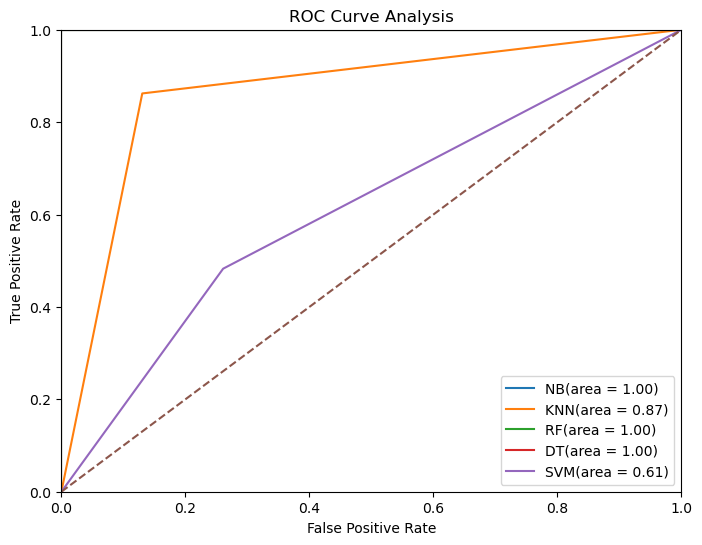

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
tpr,fpr,thresholds = roc_curve(y_test,nb_pred,pos_label=1,drop_intermediate=False)
tpr1,fpr1,thresholds1 = roc_curve(y_test,knn_pred,pos_label=1,drop_intermediate=False)
tpr2,fpr2,thresholds2 = roc_curve(y_test,rfc_pred,pos_label=1,drop_intermediate=False)
tpr3,fpr3,thresholds3 = roc_curve(y_test,dtc_pred,pos_label=1,drop_intermediate=False)
tpr4,fpr4,thresholds4 = roc_curve(y_test,sv_pred,pos_label=1,drop_intermediate=False)

#Calculate AUC SCORE
auc_nb = roc_auc_score(y_test,nb_pred)
auc_knn = roc_auc_score(y_test,knn_pred)
auc_rfc = roc_auc_score(y_test,rfc_pred)
auc_dt = roc_auc_score(y_test,dtc_pred)
auc_sv = roc_auc_score(y_test,sv_pred)

print("AUC Value for Naive Bayes:",auc_nb)
print("AUC Value for KNN:",auc_knn)
print("AUC Value for Random Forest:",auc_rfc)
print("AUC Value for Descision Tree:",auc_dt)
print("AUC Value for SVM:",auc_sv)

fig = plt.figure(figsize=(8,6))
plt.plot(tpr,fpr,label='NB(area = %0.2f)'%auc_nb)
plt.plot(tpr1,fpr1,label='KNN(area = %0.2f)'%auc_knn)
plt.plot(tpr2,fpr2,label='RF(area = %0.2f)'%auc_rfc)
plt.plot(tpr3,fpr3,label='DT(area = %0.2f)'%auc_dt)
plt.plot(tpr4,fpr4,label='SVM(area = %0.2f)'%auc_sv)
plt.legend(loc="best")
plt.plot([0, 1], [0, 1],'--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.title('ROC Curve Analysis') 
plt.show()

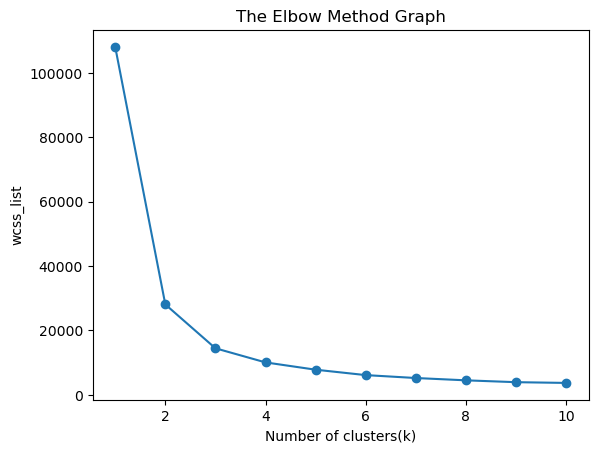

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss_list= []
df.iloc[:,[2,6,8,9,10,11,12,14,15]]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(df.iloc[:,[2,6,8,9,10,11,12,14,15]])
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list,marker='o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

[[   43.31868132  2241.64835165]
 [   46.04918033 13780.32786885]
 [   37.         28571.42857143]]
   Patient_ID Patient_Name  Patient_Age Patient_Address  Doctor_Name  \
1           2       Sunita           22           Surat     Dr.Vikas   
2           3         Amit           38          Rajkot   Dr.Shivani   
3           4        Anita           47        Vadodara      Dr.Ajit   
4           5      Santosh           14          Mumbai    Dr.Vikram   
5           6       Sanjay           49           Delhi     Dr.Pooja   
6           7        Sunil           62         Lucknow     Dr.Priya   
7           8       Rajesh           69   HyderaGeneral     Dr.Vivek   
8           9        Geeta           73       Bangalore  Dr.Arvinder   
9          10         Raju           19         Chennai     Dr.Shyam   

   Doctor_Age  Room_Type Staff_Name  Billing  Pharmacy  ...  Hospital_Type  \
1          41          1        Raj        2         2  ...              2   
2          39          

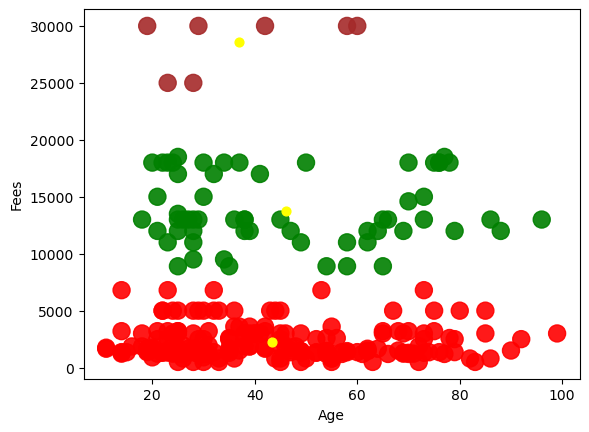

<Figure size 500x100 with 0 Axes>

In [28]:
clusters=KMeans(3)
df['cluster']= clusters.fit_predict(df[['Patient_Age','Hospital_Fees']])
centroids=clusters.cluster_centers_
print(centroids)
cen_x=[i[0] for i in centroids]
cen_y=[i[1] for i in centroids]
df['cen_x']=df.cluster.map({0:cen_x[0],1:cen_x[1],2:cen_x[2]})
df['cen_y']=df.cluster.map({0:cen_y[0],1:cen_y[1],2:cen_y[2]})
colors=['red','green','brown']
df['c']=df.cluster.map({0:colors[0],1:colors[1],2:colors[2]})
print(df[1:10])
plt.scatter(df.Patient_Age,df.Hospital_Fees,c=df.c,alpha=0.9,s=150)
plt.scatter(clusters.cluster_centers_[:,0],clusters.cluster_centers_[:,1],s=40,c='yellow',label='Center')
plt.xlabel('Age')
plt.ylabel('Fees')
plt.figure(figsize=(5,1))
plt.show()  

In [18]:
from sklearn.linear_model import LogisticRegression, LinearRegression 
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train,y_train)  
y_pred= classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0])

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print(y_pred2)
print(y_test)

[-0.19803667  0.75194205  0.43120399 -0.23139213  0.17558742  0.76704567
  0.63268512  0.78586523 -0.48967934 -0.20096157  0.01726489 -0.21687114
 -0.1114512   0.11834955  1.02668483  0.96382254  0.40483684  0.14203598
  0.42174701 -0.24294686 -0.47045396  0.64670405  0.74915346  0.73352969
 -0.24070584]
[0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0]
